<a href="https://colab.research.google.com/github/singh06-08/Flight-fare-predictor/blob/main/Flight_fare_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name-**Productionization of ML Systems

# **Team Members**

## Member 1-Sharvalik Singh (Individual)

# **Project Summary**

# **Github Link**

# **Mount Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# **Dataset Upload**

In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/Copy of users.csv')
df1

,code,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44
...,...,...,...,...,...
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/Copy of flights.csv')
df2

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,9/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,9/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/3/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/4/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
271883,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,7/12/2020
271884,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,7/16/2020
271885,135942,1339,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,7/20/2020
271886,135943,1339,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,7/23/2020


In [ ]:
df1=df1.rename(columns={'code':'userCode'})
df1




,userCode,company,name,gender,age
0,0,4You,Roy Braun,male,21
1,1,4You,Joseph Holsten,male,37
2,2,4You,Wilma Mcinnis,female,48
3,3,4You,Paula Daniel,female,23
4,4,4You,Patricia Carson,female,44
...,...,...,...,...,...
1335,1335,Umbrella LTDA,Albert Garroutte,male,23
1336,1336,Umbrella LTDA,Kim Shores,female,40
1337,1337,Umbrella LTDA,James Gimenez,male,28
1338,1338,Umbrella LTDA,Viola Agosta,female,52


In [ ]:
merged_df = pd.merge(df1, df2, on='userCode')
merged_df

,userCode,company,name,gender,age,travelCode,from,to,flightType,price,time,distance,agency,date
0,0,4You,Roy Braun,male,21,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,9/26/2019
1,0,4You,Roy Braun,male,21,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,9/30/2019
2,0,4You,Roy Braun,male,21,1,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/3/2019
3,0,4You,Roy Braun,male,21,1,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/4/2019
4,0,4You,Roy Braun,male,21,2,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271883,1339,Umbrella LTDA,Paul Rodriguez,male,35,135941,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,7/12/2020
271884,1339,Umbrella LTDA,Paul Rodriguez,male,35,135942,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,7/16/2020
271885,1339,Umbrella LTDA,Paul Rodriguez,male,35,135942,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,7/20/2020
271886,1339,Umbrella LTDA,Paul Rodriguez,male,35,135943,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,7/23/2020


In [ ]:
merged_df=merged_df.rename(columns={'to':'to_city','from':'from_city'})
merged_df


,userCode,company,name,gender,age,travelCode,from_city,to_city,flightType,price,time,distance,agency,date
0,0,4You,Roy Braun,male,21,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,9/26/2019
1,0,4You,Roy Braun,male,21,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,9/30/2019
2,0,4You,Roy Braun,male,21,1,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/3/2019
3,0,4You,Roy Braun,male,21,1,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/4/2019
4,0,4You,Roy Braun,male,21,2,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271883,1339,Umbrella LTDA,Paul Rodriguez,male,35,135941,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,7/12/2020
271884,1339,Umbrella LTDA,Paul Rodriguez,male,35,135942,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,7/16/2020
271885,1339,Umbrella LTDA,Paul Rodriguez,male,35,135942,Natal (RN),Florianopolis (SC),economic,873.07,1.84,709.37,CloudFy,7/20/2020
271886,1339,Umbrella LTDA,Paul Rodriguez,male,35,135943,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62,1.21,466.30,CloudFy,7/23/2020


# **Check for Null Values**

In [ ]:
merged_df.isnull().sum()

,0
userCode,0
company,0
name,0
gender,0
age,0
travelCode,0
from_city,0
to_city,0
flightType,0
price,0


# **Check For Duplicate values**

In [ ]:
merged_df.duplicated().sum()

0

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   userCode    271888 non-null  int64  
 1   company     271888 non-null  object 
 2   name        271888 non-null  object 
 3   gender      271888 non-null  object 
 4   age         271888 non-null  int64  
 5   travelCode  271888 non-null  int64  
 6   from_city   271888 non-null  object 
 7   to_city     271888 non-null  object 
 8   flightType  271888 non-null  object 
 9   price       271888 non-null  float64
 10  time        271888 non-null  float64
 11  distance    271888 non-null  float64
 12  agency      271888 non-null  object 
 13  date        271888 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 29.0+ MB


# **Exploratory Data Analysis(EDA)**

Display flight price variation by source and destination

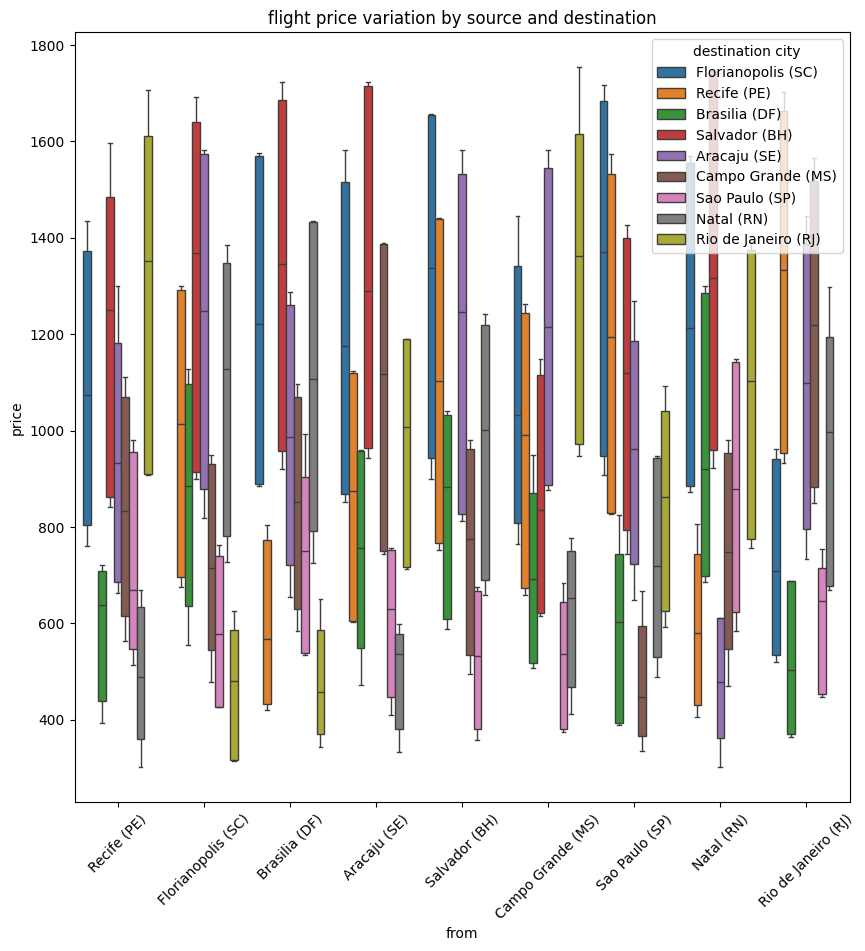

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x='from_city',y='price',data=merged_df,hue='to_city')
plt.title('flight price variation by source and destination')
plt.xlabel('from')
plt.ylabel('price')
plt.legend(title='destination city')
plt.xticks(rotation=45)
plt.show()

Display flight price variation by distance

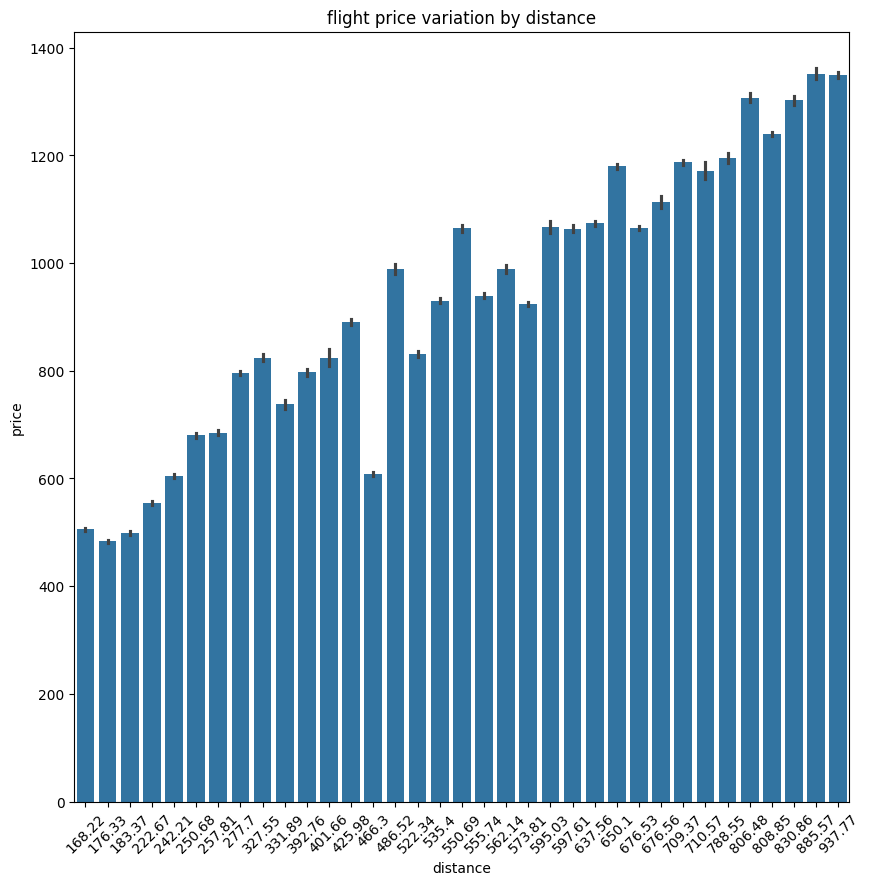

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='distance',y='price',data=merged_df)
plt.title('flight price variation by distance')
plt.xlabel('distance')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

Display flight price variation by agency

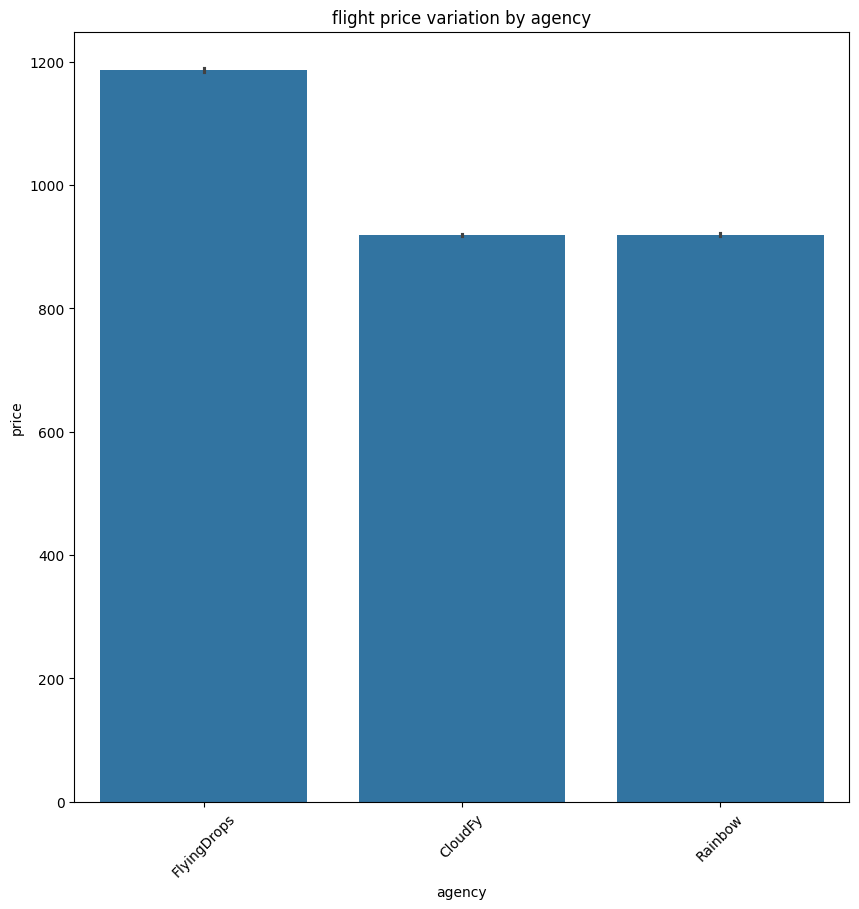

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(x='agency',y='price',data=merged_df)
plt.title('flight price variation by agency')
plt.xlabel('agency')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.show()

In [ ]:
merged_df.describe()

,userCode,age,travelCode,price,time,distance
count,271888.000000,271888.000000,271888.000000,271888.00000,271888.000000,271888.000000
mean,667.505495,42.815005,67971.500000,957.37503,1.421147,546.955535
std,389.523127,12.946294,39243.724665,362.31189,0.542541,208.851288
min,0.000000,21.000000,0.000000,301.51000,0.440000,168.220000
25%,326.000000,32.000000,33985.750000,672.66000,1.040000,401.660000
50%,659.000000,42.000000,67971.500000,904.00000,1.460000,562.140000
75%,1011.000000,54.000000,101957.250000,1222.24000,1.760000,676.530000
max,1339.000000,65.000000,135943.000000,1754.17000,2.440000,937.770000


In [ ]:
merged_df=merged_df.drop(columns=['company','userCode','company','name','gender','age','travelCode','time','distance','agency','date'])

In [ ]:
merged_df

,from_city,to_city,flightType,price
0,Recife (PE),Florianopolis (SC),firstClass,1434.38
1,Florianopolis (SC),Recife (PE),firstClass,1292.29
2,Brasilia (DF),Florianopolis (SC),firstClass,1487.52
3,Florianopolis (SC),Brasilia (DF),firstClass,1127.36
4,Aracaju (SE),Salvador (BH),firstClass,1684.05
...,...,...,...,...
271883,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34
271884,Florianopolis (SC),Natal (RN),economic,726.95
271885,Natal (RN),Florianopolis (SC),economic,873.07
271886,Florianopolis (SC),Rio de Janeiro (RJ),economic,313.62


Display the distribution of flight prices

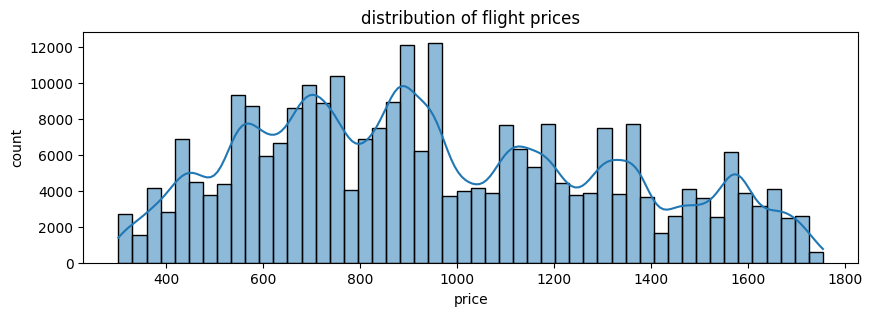

In [ ]:
plt.figure(figsize=(10,3))
sns.histplot(merged_df['price'],bins=50,kde=True)
plt.title('distribution of flight prices')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [ ]:
merged_df.to_city.unique()

array(['Florianopolis (SC)', 'Recife (PE)', 'Brasilia (DF)',
       'Salvador (BH)', 'Aracaju (SE)', 'Campo Grande (MS)',
       'Sao Paulo (SP)', 'Natal (RN)', 'Rio de Janeiro (RJ)'],
      dtype=object)

In [ ]:
merged_df['to_city'].value_counts()

,count
to_city,
Florianopolis (SC),57317
Aracaju (SE),37224
Campo Grande (MS),34748
Brasilia (DF),30779
Recife (PE),30480
Natal (RN),23796
Sao Paulo (SP),23625
Salvador (BH),17104
Rio de Janeiro (RJ),16815


In [ ]:
destination_mapping = {
   'Florianopolis(SC)' :0,
   'Aracaju (SE)' :  1,
   'Campo Grande (MS)':2,
   'Brasilia (DF)'  :3 ,
   'Recife (PE)'  :4 ,
   'Natal (RN) '   :5 ,
   'Sao Paulo (SP)':6 ,
   'Salvador (BH) ' :7 ,
   'Rio de Janeiro (RJ)':8
}
merged_df['to_city'] = merged_df['to_city'].map(destination_mapping)

In [ ]:
merged_df['from_city'].value_counts()

,count
from_city,
Florianopolis (SC),57317
Aracaju (SE),37224
Campo Grande (MS),34748
Brasilia (DF),30779
Recife (PE),30480
Natal (RN),23796
Sao Paulo (SP),23625
Salvador (BH),17104
Rio de Janeiro (RJ),16815


In [ ]:
source_mapping = {
   'Florianopolis(SC)' :0,
   'Aracaju (SE)' :  1,
   'Campo Grande (MS)':2,
   'Brasilia (DF)'  :3 ,
   'Recife (PE)'  :4 ,
   'Natal (RN) '   :5 ,
   'Sao Paulo (SP)':6 ,
   'Salvador (BH) ' :7 ,
   'Rio de Janeiro (RJ)':8
}
merged_df['from_city'] = merged_df['from_city'].map(destination_mapping)

In [ ]:
merged_df['flightType'].value_counts()

,count
flightType,
firstClass,116418
premium,78004
economic,77466


In [ ]:
flight_type_mapping = {
    'firstClass' : 0,
    'premium' : 1,
    'economic': 2
}
merged_df['flightType'] = merged_df['flightType'].map(flight_type_mapping)

In [ ]:
merged_df.describe()

,from_city,to_city,flightType,price
count,173671.000000,173671.000000,271888.000000,271888.00000
mean,3.438956,3.438956,0.856735,957.37503
std,2.164508,2.164508,0.832214,362.31189
min,1.000000,1.000000,0.000000,301.51000
25%,2.000000,2.000000,0.000000,672.66000
50%,3.000000,3.000000,1.000000,904.00000
75%,4.000000,4.000000,2.000000,1222.24000
max,8.000000,8.000000,2.000000,1754.17000


# **Correlation heatmap**

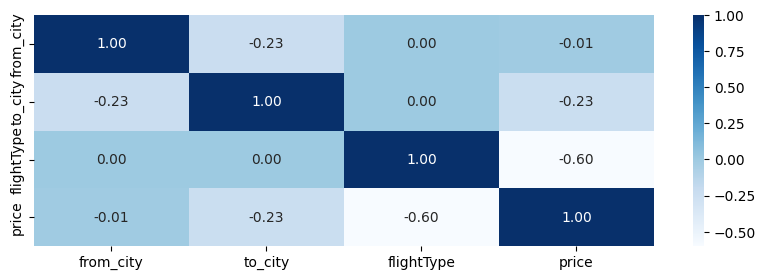

In [ ]:
# Convert relevant columns to numeric type before calculating correlation
merged_df_numeric = merged_df.apply(pd.to_numeric, errors='coerce')

plt.figure(figsize=(10,3))
sns.heatmap(merged_df_numeric.corr(),annot=True,fmt='.2f',cmap='Blues')
plt.show()

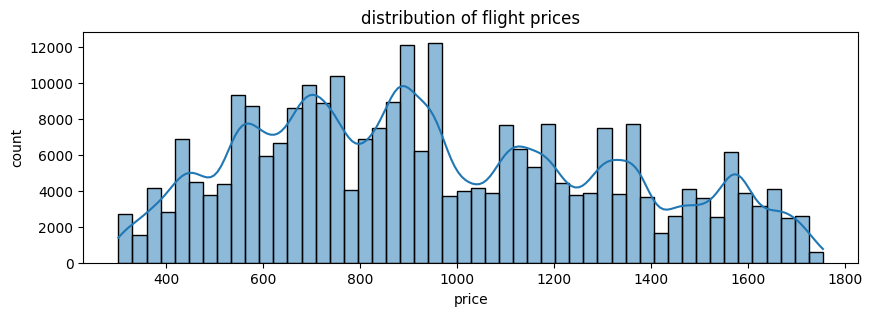

In [ ]:
plt.figure(figsize=(10,3))
sns.histplot(merged_df['price'],bins=50,kde=True)
plt.title('distribution of flight prices')
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [ ]:
x=merged_df.drop(columns=['price'])
y=merged_df['price']

# **Train and Test**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl

sns.set()

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn import metrics

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean') # You can choose a different strategy if needed
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test) # Use the same imputer fitted on training data


In [ ]:
# getting feature importance to the target variable "Price".
selection =ExtraTreesRegressor()
# Use the imputed data (x_train) instead of the original data (x)
selection.fit(x_train,y_train)
selection.feature_importances_

array([0.25657037, 0.28463326, 0.45879637])

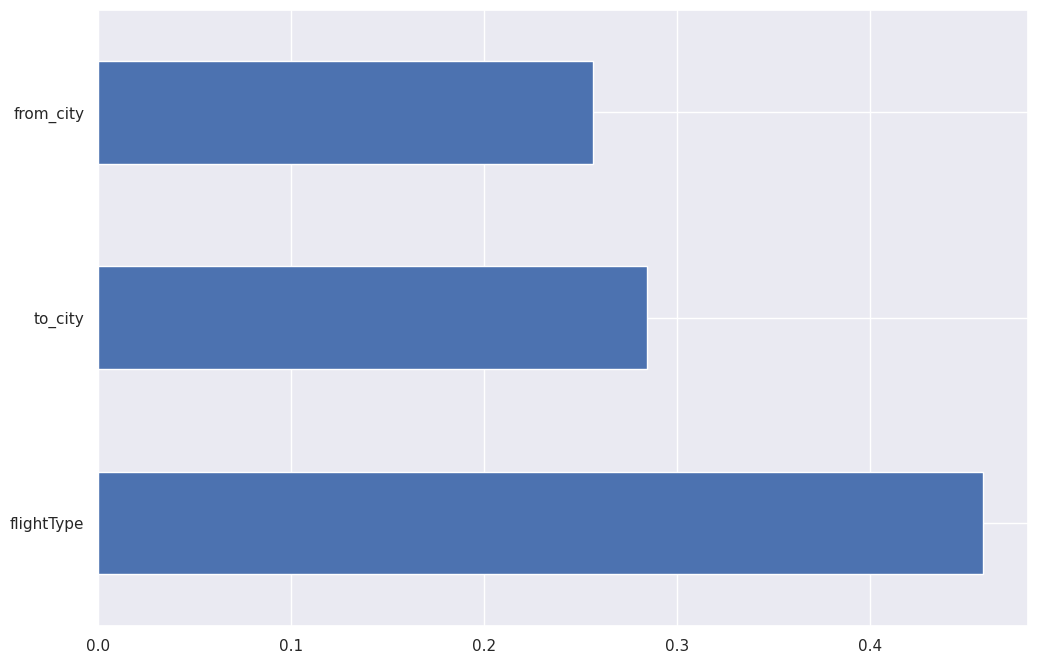

In [ ]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_,index = x.columns)
feat_importances.nlargest(20).plot(kind="barh")
plt.show()

# **Model Implementation**

In [ ]:
#regression model
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit (x_train, y_train)

RandomForestRegressor(random_state=42)

# **Model Evaluation**

In [ ]:
#modelevaluation
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2)

0.7888691283023476


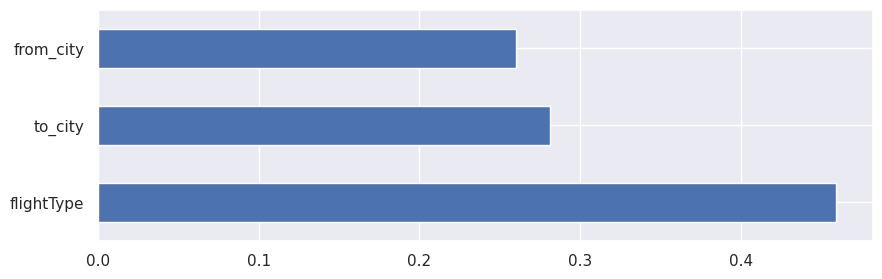

In [ ]:
plt.figure(figsize=(10,3))
feature_importance=pd.Series(model.feature_importances_,index=x.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


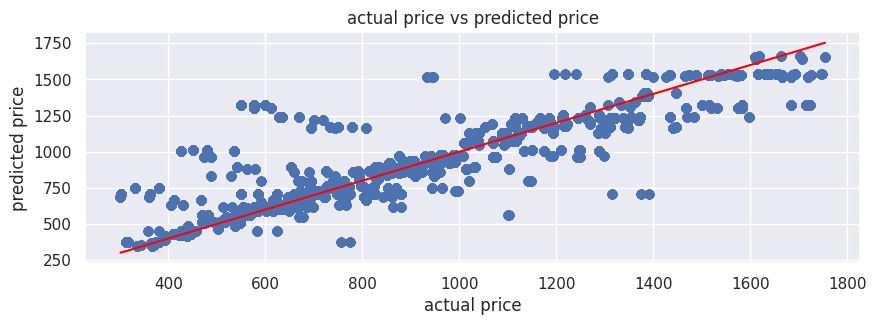

In [ ]:
plt.figure(figsize=(10,3))
plt.scatter(y_test,y_pred)
plt.xlabel('actual price')
plt.ylabel('predicted price')
plt.title('actual price vs predicted price')
plt.plot([min(y_test),max(y_test)], [min(y_test),max(y_test)], color='red')
plt.show()

# **Prediction System**

In [ ]:
#PREDICTION SYSTEM
def predict_flight_fare(from_city, to_city, flightType) :
  destination_encoded = destination_mapping.get(to_city,-1) # Assign the result of the lookup to destination_encoded
  source_encoded = source_mapping.get(from_city, -1)
  flight_type_encoded = flight_type_mapping.get(flightType, -1)
  if -1 in (destination_encoded, source_encoded, flight_type_encoded):
    print("Invalid input. Please provide valid input.")

  features=[[ from_city, to_city, flightType]]
  features_scaled=scalar.transform(features)

  predicted_price=model.predict(features_scaled)
  return predicted_price[0]

In [ ]:
#PREDICTION SYSTEM
def predict_flight_fare(from_city, to_city, flightType) :
  destination_encoded = destination_mapping.get(to_city,-1) # Assign the result of the lookup to destination_encoded
  source_encoded = source_mapping.get(from_city, -1)
  flight_type_encoded = flight_type_mapping.get(flightType, -1)
  if -1 in (destination_encoded, source_encoded, flight_type_encoded):
    print("Invalid input. Please provide valid input.")


  # Use encoded values instead of raw strings
  features=[[ source_encoded, destination_encoded, flight_type_encoded]]
  features_scaled=scalar.transform(features)

  predicted_price=model.predict(features_scaled)
  return predicted_price[0]

In [ ]:
predicted_price= predict_flight_fare ('Recife','Florianopolis','firstClass')
print(f"predicted_price:{predicted_price}")

Invalid input. Please provide valid input.
predicted_price:1534.3609310668733


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# **Model Save**

In [ ]:
# save the model
file = open('model_prediction.pkl', 'wb')
pkl.dump(model, file)

In [ ]:
file.close()

In [ ]:
my_model = open('model_prediction.pkl','rb')
model_prediction = pkl.load(my_model)
my_model.close()